<a href="https://colab.research.google.com/github/Samueljp/03MAIR_Algoritmos_de_Optimizaci-n/blob/develop/Pruebas/Ejemplo_networkx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Uso de librería Networkx

Ésta es una gúia básica de como utilizar la librería Networkx https://networkx.github.io/documentation/stable/.
Parece fácil de utilizar y tiene un tutorial básico en https://networkx.github.io/documentation/stable/tutorial.html.

En mi caso, usé esta librería para representar las tarifas del ejercicio de AG2.


In [0]:
import matplotlib.pyplot as plt
import networkx as nx

def dibujarGrafo(TARIFAS):
    N = len(TARIFAS[0])
    
    # Declaración de Gráfico a utilizar
    # En este caso tenemos que utilizar un grafo dirigido aunque hay más en: https://networkx.github.io/documentation/stable/reference/classes/index.html
    G=nx.DiGraph()
    
    # Añadimos Nodos de manera que tengamos tantos nodos como tenga el problema
    for i in range(N): G.add_node(str(i))
        
    # Recorremos la matriz añadiendo una arista dirigida cuando exista un camino entre el nodo origen hasta el nodo destino
    for i in range(N):
        for j in range(i,N):
            # Condición de que sea un camino viable
            if TARIFAS[i][j] < 999:
                # Añadimos la arista desde el origen "i" hasta el destino "j" con peso "coste de i a j"
                G.add_edge(str(i),str(j), weight=TARIFAS[i][j])

    # Este paso es necesario si queremos mostrar el valor de las aristas
    # Generamos un diccionario de las aristas para poder dibujarlas en el grafo a continuación
    # Utilizamos el atributo 'weight' de las aristas para asignar un valor a la etiqueta
    edge_labels=dict([((u,v,),d['weight']) for u,v,d in G.edges(data=True)])
    
    print("labels: \n", edge_labels)
    
    # Este paso es necesario para definir la colocación de los nodos y aristas a dibujar
    # Básicamente, este método genera una distribución ajustada al modelo de los nodos y aristas en el espacio
    # Existen varias maneras de generar esta distribución pero la que he encontrado que mejor se ajusta es ésta
    # ya que esta función utiliza el atributo 'weight' de las aristas para ajustar la posición de los nodos
    # Otros: https://networkx.github.io/documentation/latest/reference/drawing.html#layout
    # Además existen varias librerías para generar vistas con distintas distribuciones
    pos=nx.kamada_kawai_layout(G)
    #pos=nx.spring_layout(G,k=1,iterations=1000)
    #pos=nx.spectral_layout(G)
    
    print("pos: \n" , pos)
    
    # Se dibuja el grafo con las etiquetas de los nodos utilizando las posiciones generadas anteriormente
    nx.draw(G,pos,with_labels=True)
    
    # Se dibujan las aristas direccionadas entre los nodos conectados con sus valores
    nx.draw_networkx_edge_labels(G,pos,with_labels=True,edge_labels=edge_labels)
    return G
    

labels: 
 {('0', '0'): 0, ('0', '1'): 5, ('0', '2'): 4, ('0', '3'): 3, ('1', '1'): 0, ('1', '3'): 2, ('1', '4'): 3, ('1', '6'): 11, ('2', '2'): 0, ('2', '3'): 1, ('2', '5'): 4, ('2', '6'): 10, ('3', '3'): 0, ('3', '4'): 5, ('3', '5'): 6, ('3', '6'): 9, ('4', '4'): 0, ('4', '6'): 4, ('5', '5'): 0, ('5', '6'): 3, ('6', '6'): 0}
pos: 
 {'0': array([-0.0609772,  1.       ]), '1': array([0.36966617, 0.20030217]), '2': array([-0.13626679,  0.29758486]), '3': array([0.02393638, 0.41137607]), '4': array([ 0.44445889, -0.42239555]), '5': array([-0.49773123, -0.50484037]), '6': array([-0.14308623, -0.98202719])}


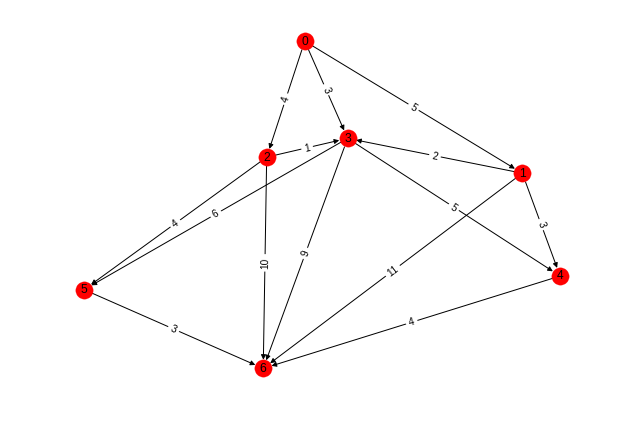

In [2]:
TARIFAS = [[0,5,4,3,999,999,999],
           [999,0,999,2,3,999,11],
           [999,999, 0,1,999,4,10],
           [999,999,999, 0,5,6,9],
           [999,999, 999,999,0,999,4],
           [999,999, 999,999,999,0,3],
           [999,999,999,999,999,999,0]]

G = dibujarGrafo(TARIFAS)

### Además de dibujar...
Esta librería tiene métodos para calcular caminos y distancias entre nodos y algunos más complejos con los que podremos validar resultados de nuestros algoritmos..

https://networkx.github.io/documentation/stable/reference/algorithms/index.html


Concretamente el del camino más corto es: https://networkx.github.io/documentation/stable/reference/algorithms/shortest_paths.html


In [3]:
print("Camino más corto(0-6): ", nx.shortest_path(G, source="0", target="6",weight="weight"))
print("Distancia de camino más corto(0-6): ", nx.shortest_path_length(G, source="0", target="6",weight="weight"))

Camino más corto(0-6):  ['0', '2', '5', '6']
Distancia de camino más corto(0-6):  11
